# Student Performance Indicator

## Lifecycle of Machine Learning Project

* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory Data Analysis
* Data Pre-Processing
* Model Training
* Choose Best Model

## Problem Statement

* This project understands how the student's performance (test scores) is affected by other variables such as 
    * Gender
    * Ethnicity
    * Parental Level of Education
    * Lunch
    * Test Preparation Course

## Data Collection

* Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
* The data consists of 8 columns and 1000 rows

### Import Data and Required packages

##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the Dataset

In [4]:
df.shape

(1000, 8)

### Dataset Information

* gender : sex of students -> (Male/Female)
* race/ethnicity : ethnicity of students -> (Group A, B, C, D, E)
* parental level of education : parents final education -> (bachelor's degree, some college, master's degree, associate's degree, high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score
* reading score
* writing score

## Data Checks to perform

* Check Missing Values
* Check Duplicates
* Check Data Type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

### Check Missing Values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the dataset

### Check Duplicates

In [6]:
df.duplicated().sum()

0

There are no duplicate values in the dataset

### Check Data Types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### Check the Statistics of the data set

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insight

* From the above description of the numerical data, all means are very close to each other - between 66 and 68.05
* All standard deviations are also close - between 14.6 and 15.19
* While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading much higher = 17

### Exploring Data

In [11]:
print("Categories in 'gender' variable: ",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable: ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable: ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable: ",end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:  ['none' 'completed']


In [12]:
# Define Numerical & Categorical Columns
numerical_features = [feature for feature in df.columns  if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns  if df[feature].dtype == 'O']

# print columns
print("We have {} numerical features : {}".format(len(numerical_features),numerical_features))
print("\nWe have {} categorical features : {}".format(len(categorical_features),categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding Columns for "Total Score" and "Average"

In [13]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [ ]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

In [ ]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

### Insights

* From above values, we understand that the students have performed the worst in Maths
* Best performance is in Reading Sections

## Exploring Data (Visualization)

### Visualize average score distribution to make some conclusion

* Histogram
* Kernel Distribution Function (KDE)

#### Histogram & KDE's

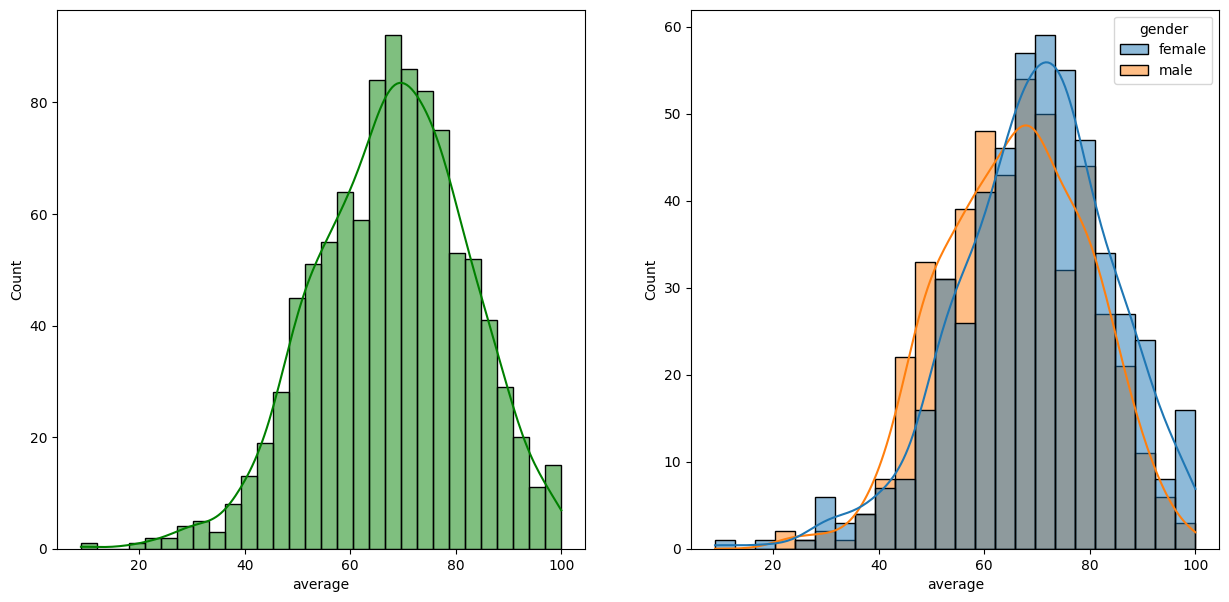

In [17]:
fig, axs = plt.subplots(1,2,figsize=(15,7))

sns.histplot(
    data=df,
    x='average',
    bins=30,
    kde=True,
    color='g',
    ax=axs[0])

sns.histplot(
    data=df,
    x='average',
    kde=True,
    hue='gender',
    ax=axs[1]
)
plt.show()

### Insight

* Female students tend to perform well than male students

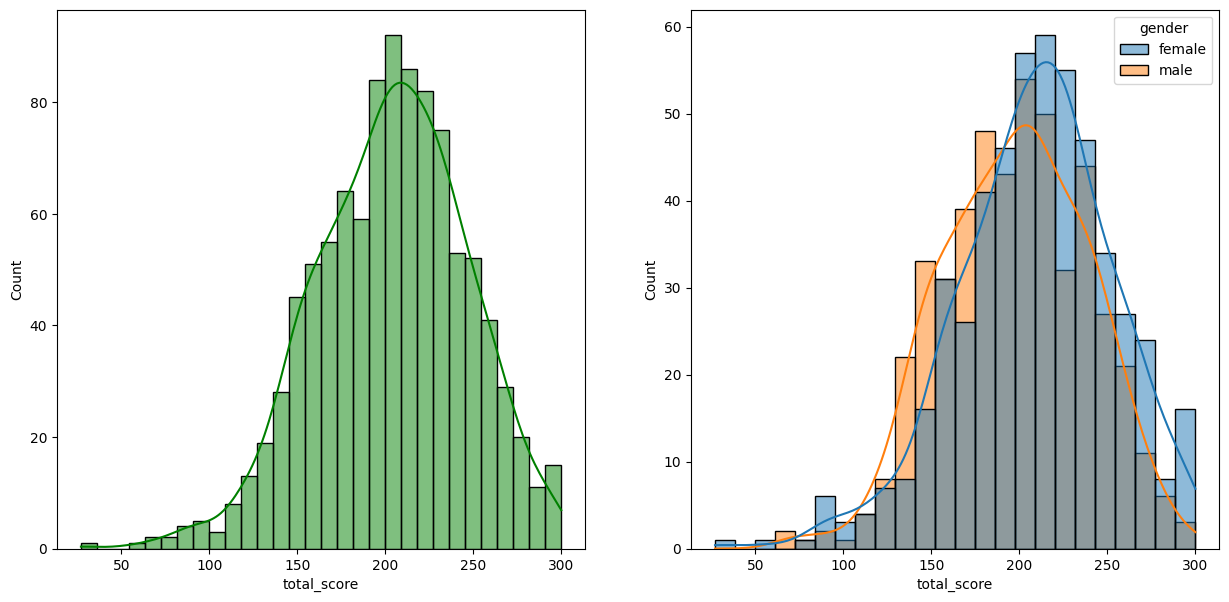

In [18]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
sns.histplot(
    data=df,
    x='total_score',
    bins=30,
    kde=True,
    color='g',
    ax=axs[0]
)

sns.histplot(
    data = df,
    x = 'total_score',
    kde=True,
    hue='gender',
    ax=axs[1]
)

plt.show()

### Insight

* Female Students tend to perform well than Male Students

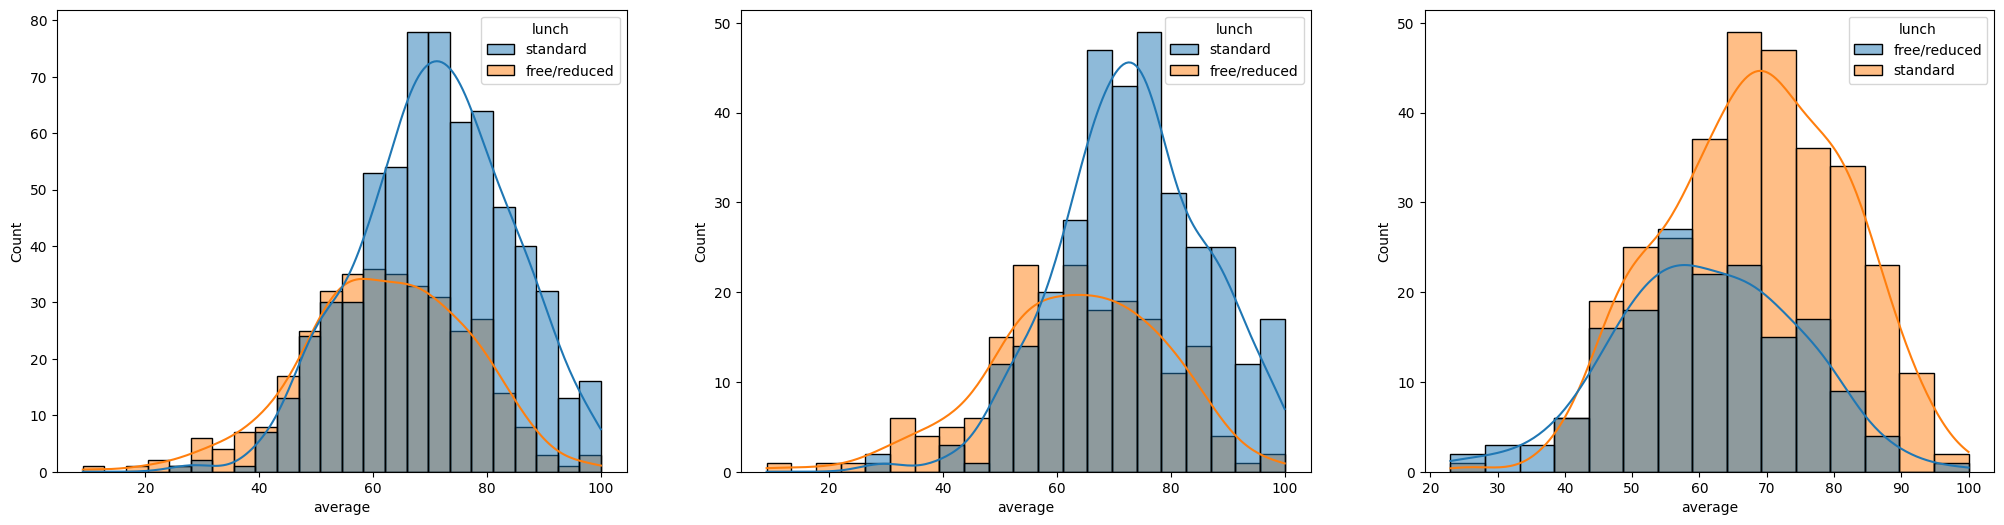

In [21]:
fig,axs = plt.subplots(1,3,figsize=(25,6))
sns.histplot(
    data=df,
    x='average',
    kde=True,
    hue='lunch',
    ax=axs[0]
)

sns.histplot(
    data=df[df['gender']=='female'],
    x='average',
    kde=True,
    hue='lunch',
    ax=axs[1]
)

sns.histplot(
    data=df[df['gender']=='male'],
    x='average',
    kde=True,
    hue='lunch',
    ax=axs[2]
)

plt.show()

### Insights

* Standard lunch helps perform well in exams
* Standard lunch helps perform well in exams be it a male student or a female student

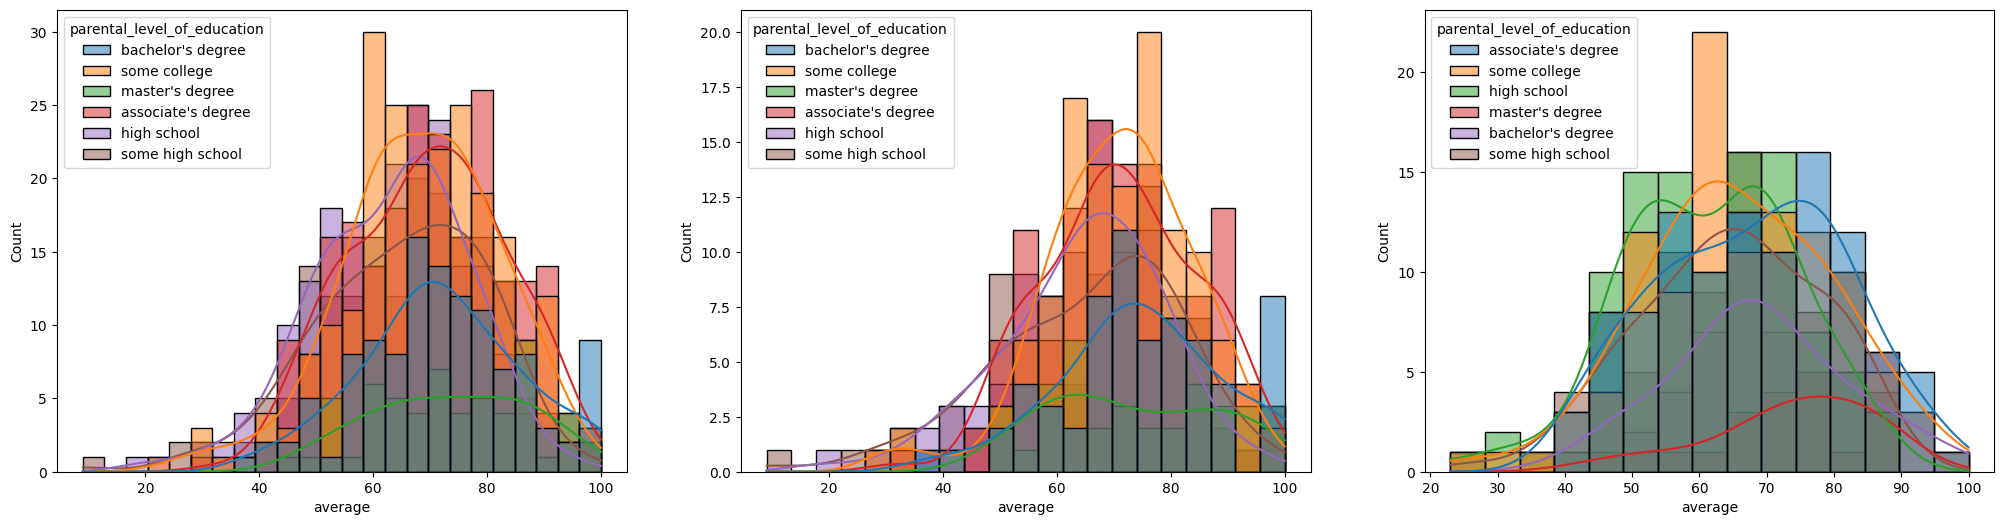

In [22]:
fig,axs = plt.subplots(1,3,figsize=(25,6))
sns.histplot(
    data=df,
    x='average',
    kde=True,
    hue='parental_level_of_education',
    ax=axs[0]
)

sns.histplot(
    data=df[df['gender']=='female'],
    x='average',
    kde=True,
    hue='parental_level_of_education',
    ax=axs[1]
)

sns.histplot(
    data=df[df['gender']=='male'],
    x='average',
    kde=True,
    hue='parental_level_of_education',
    ax=axs[2]
)

plt.show()

### Insights

* In general, parent's education does not help students perform well in the exam.
* Plot 2 shows that the male child of parent's whose education is of associate's degree or master's degree perform well in exams
* Plot 3 shows that there is no effect fo parent's education on female students.

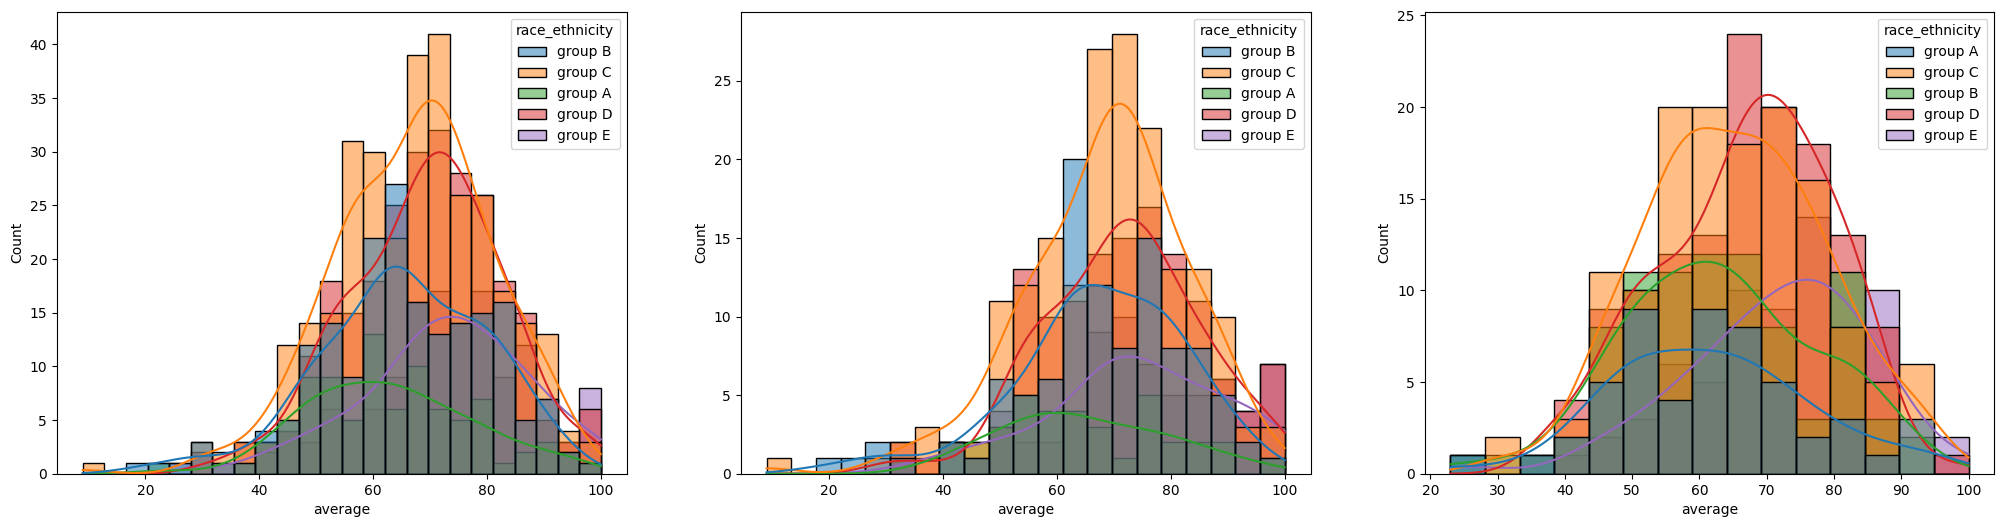

In [23]:
fig,axs = plt.subplots(1,3,figsize=(25,6))
sns.histplot(
    data=df,
    x='average',
    kde=True,
    hue='race_ethnicity',
    ax=axs[0]
)

sns.histplot(
    data=df[df['gender']=='female'],
    x='average',
    kde=True,
    hue='race_ethnicity',
    ax=axs[1]
)

sns.histplot(
    data=df[df['gender']=='male'],
    x='average',
    kde=True,
    hue='race_ethnicity',
    ax=axs[2]
)

plt.show()

### Insights

* Students of Group A and Group B tend to perform poorly in exam
* Students of Group A and Group B tend to perform poorly in exam irrespective of whether they are male or female

### Maximum Score of Students in all 3 subjects

Text(0.5, 1.0, 'WRITING SCORES')

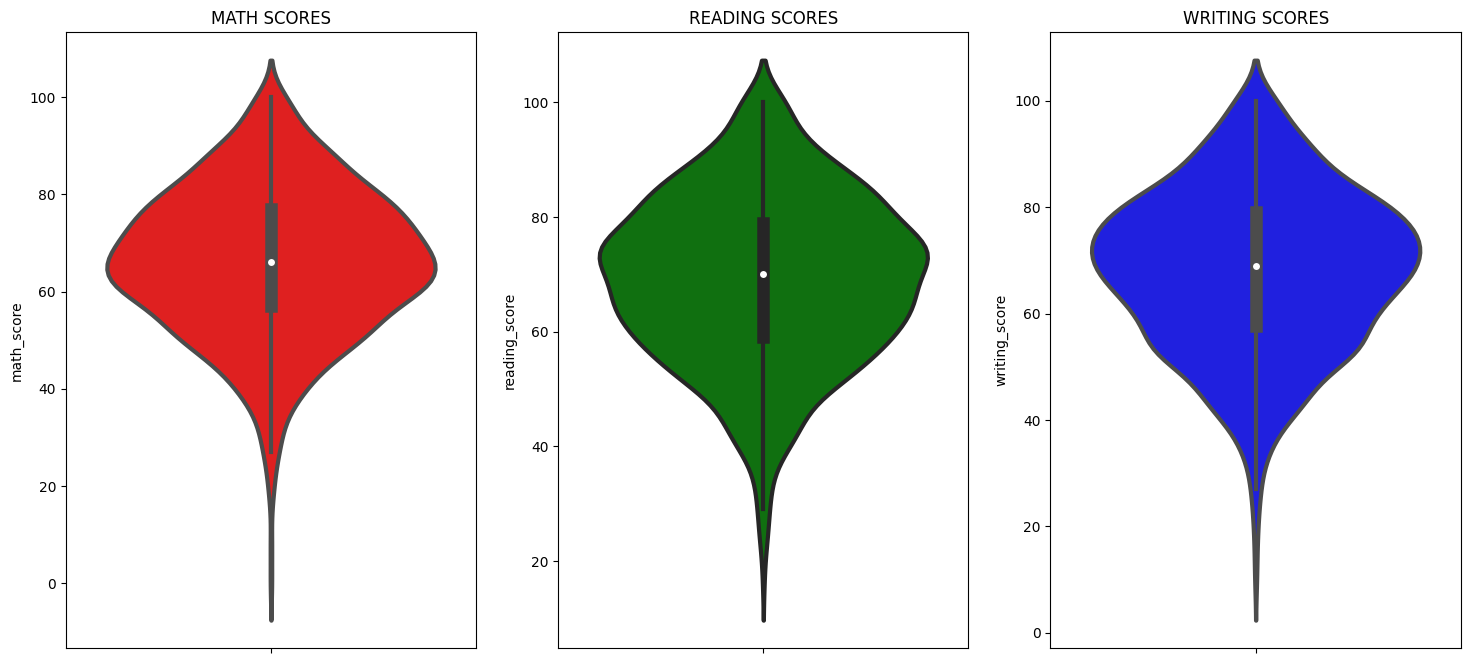

In [26]:
fig,axs = plt.subplots(1,3,figsize=(18,8))

sns.violinplot(
    y='math_score',
    data=df,
    color='red',
    linewidth=3,
    ax=axs[0]
)

sns.violinplot(
    y='reading_score',
    data=df,
    color='green',
    linewidth=3,
    ax=axs[1]
)

sns.violinplot(
    y='writing_score',
    data=df,
    color='blue',
    linewidth=3,
    ax=axs[2]
)

axs[0].set_title('MATH SCORES')
axs[1].set_title('READING SCORES')
axs[2].set_title('WRITING SCORES')

### Insight

* From the above 3 plots, it is clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing, most of them score from 50-80

### Mutlivariate Analysis using PiePlot

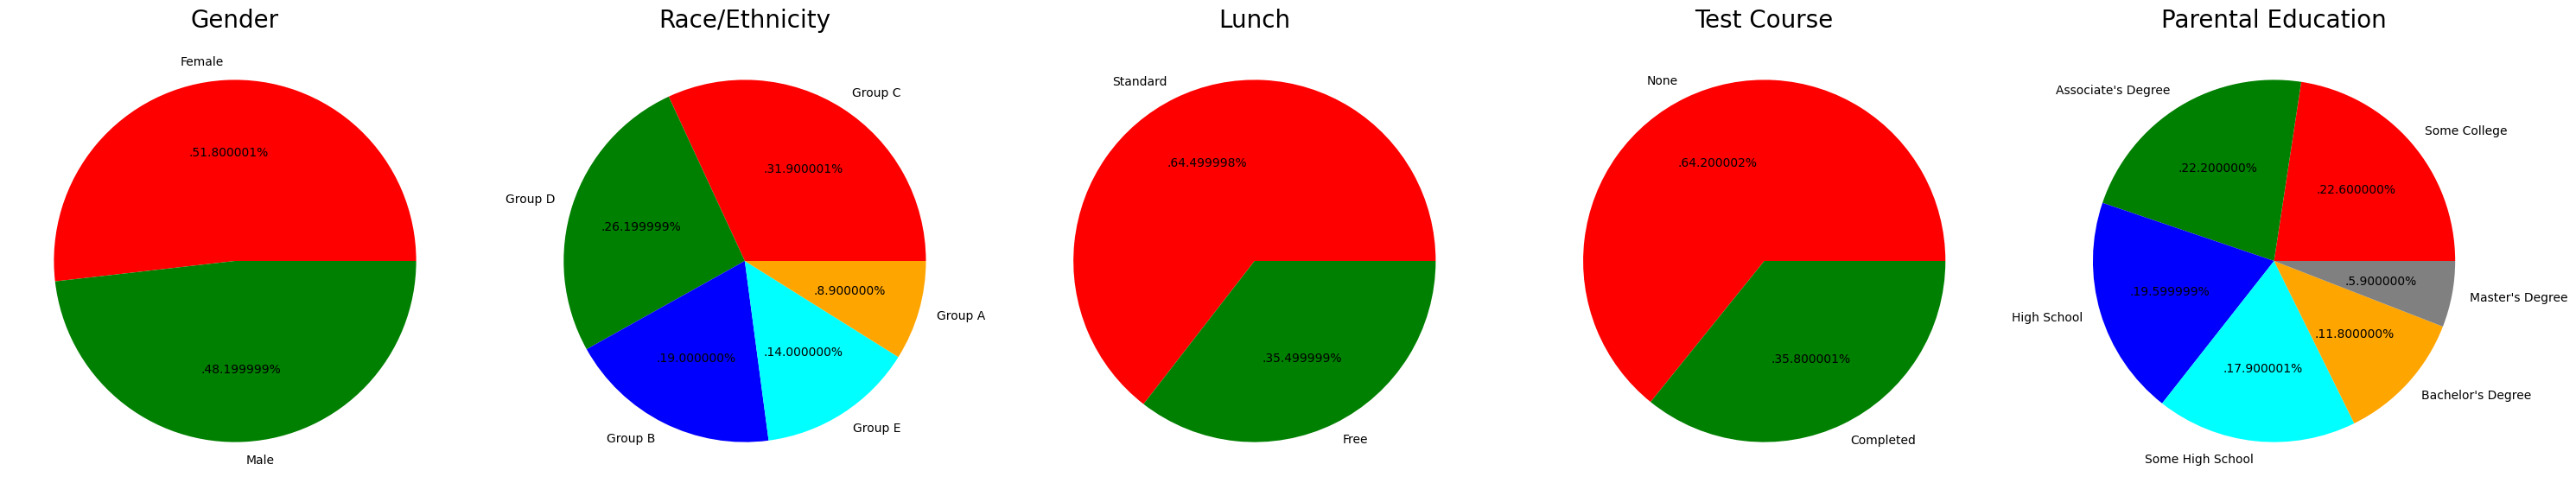

In [29]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

### Insight

* Number of Male and Female Students is almost equal
* Group C has maximum number of students
* There are more number of students with standard lunch
* There are more number of students who have not enrolled in any test preparation course
* There are more number of students whose parental education is "Some College" followed closely by "Associate's Degree"

### Feature Wise Visualization

#### GENDER

* How is the distribution of Gender?
* Does gender have any impact on student's performance?

#### UNIVARIATE ANALYSIS (How is distribution of Gender?)

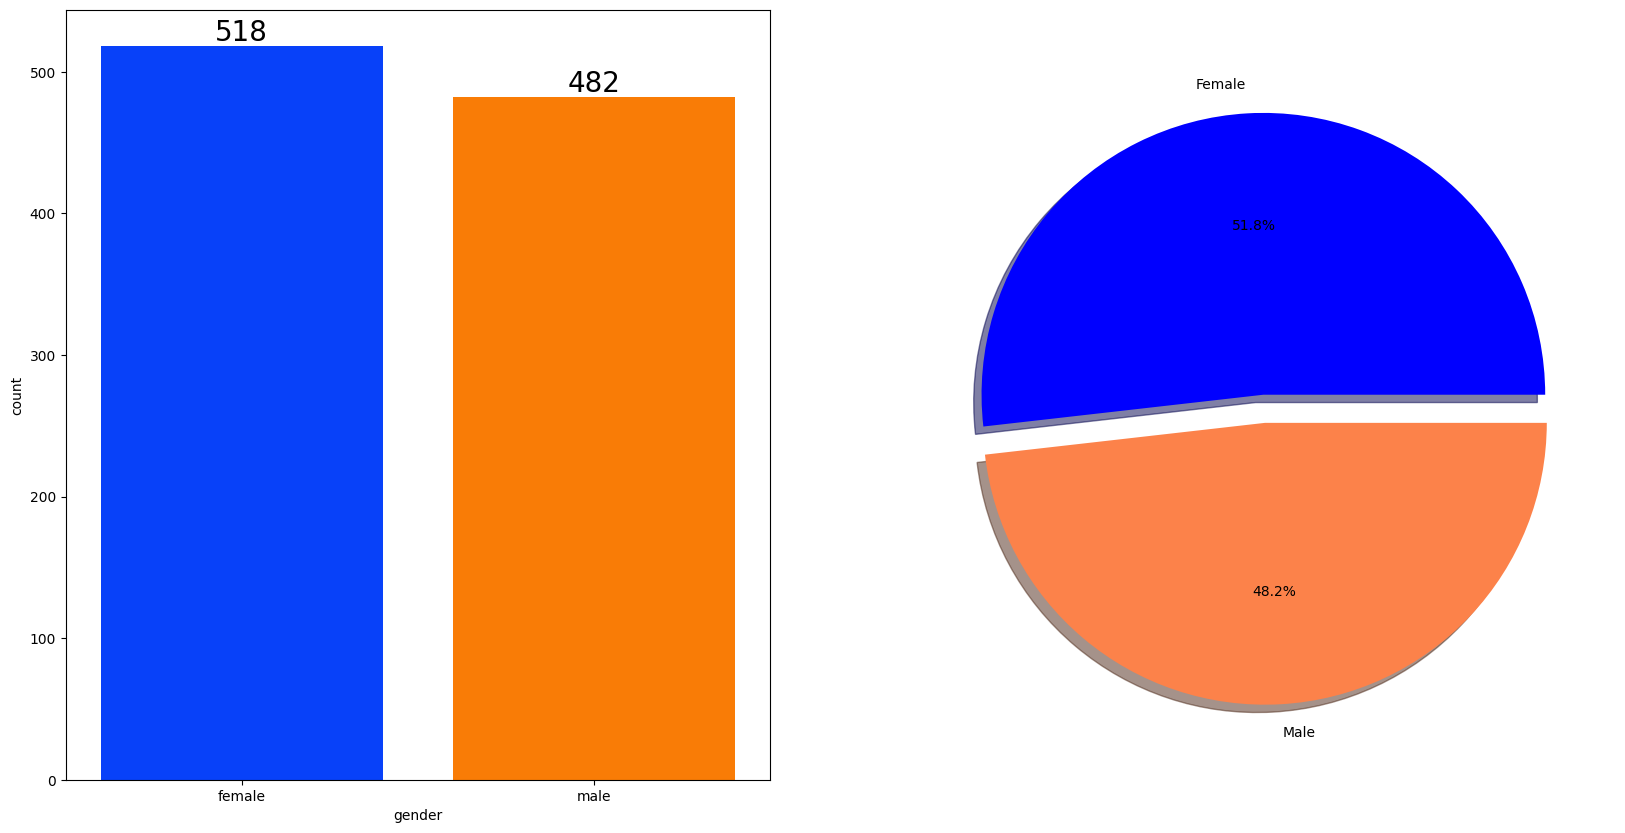

In [34]:
fig,axs = plt.subplots(1,2,figsize=(20,10))
sns.countplot(
    x=df['gender'],
    data=df,
    palette='bright',
    ax=axs[0],
    saturation=0.95
)

for container in axs[0].containers:
    axs[0].bar_label(container,color='black',size=20)

plt.pie(
    x=df['gender'].value_counts(),
    labels=['Female','Male'],
    explode=[0,0.1],
    autopct='%1.1f%%',
    shadow=True,
    colors=['blue','#fc824a']
)

plt.show()

Gender has balanced data with female students are 518 (51.8%) and male students are 482 (48.2%)

#### BIVARIATE ANALYSIS (Does Gender have any impact on student's performance?)

In [41]:
gender_group = df.groupby('gender')
gender_group

In [40]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

In [39]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

KeyError: 'average'

<Figure size 1000x800 with 0 Axes>